# Report on the dataset
## Author: Mohammad Mosaffa
In this report, the dataset of the company's repair service system will be explained 

In the first step, dataset should be read and some fundamental libraries are called.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df=pd.read_excel('C:/Users/moham/OneDrive/Desktop/Article/Dataset/Final_Dataset.xlsx',na_values=' ')

In this section, five first records of the dataset are shown.

In [13]:
df.head()

,Code,Enter_Date,Enter_Month,Enter_Day_Name,Enter_Year,Enter_Time,Brand,Model,Explanation,Estimated_Price,Received_in_Day,In_Queue,TotalDays,DaysToStart,DaysToFinished
0,CN00000012,2016-02-01,February,Monday,2016,16:20:36,sony,FW,تصوير نمي دهد يا رندوم احتمال خاموشي ok نيست,800000 jتا 1100000,0,1,15,15,0
1,CN00000086,2016-02-08,February,Monday,2016,18:31:19,DELL,5040,بعد از مدتي خاموش مي کند احتمال خاموشي ok فن...,درحال تعمير,1,1,15,12,3
2,CN00000161,2016-02-09,February,Tuesday,2016,18:31:05,HP,DV2000,فلت 800000 ال اي دي 1850000 نور دارد تصوير ن...,مشکل گرافيک دارد,2,1,18,16,2
3,CN00000191,2016-02-10,February,Wednesday,2016,18:30:19,sony,SVF14,تصوير نمي دهد فلت 800000 ال اي دي 1850000 يا ...,ال اي دي چک شد تصوير نمي دهد فلت موجود نيست,3,1,5,5,0
4,CN00000175,2016-02-11,February,Thursday,2016,12:23:06,MACBOOK,A1278,تصوير پرش دارد بعد از 5 دقيقه ابتدا مشکل دي...,0,4,4,46,24,22


In [16]:
df.shape

(40365, 15)

It should be mentioned that the three last columns are dependent with each other. In other words, the **DaysToStart + DaysToFinished = TotalDays**; DaysToStart give us how long does it takes for a specific device's repair process is started. The DaysToFinished inform us about how long does it takes a repair process for a specific device. As a result, the total waiting-time for a customer is TotalDays.

In the following, these two columns will be eliminated. 

In [19]:
df.iloc[:,:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40365 entries, 0 to 40364
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Code             40365 non-null  object        
 1   Enter_Date       40365 non-null  datetime64[ns]
 2   Enter_Month      40365 non-null  object        
 3   Enter_Day_Name   40365 non-null  object        
 4   Enter_Year       40365 non-null  int64         
 5   Enter_Time       40365 non-null  object        
 6   Brand            40365 non-null  object        
 7   Model            40365 non-null  object        
 8   Explanation      40341 non-null  object        
 9   Estimated_Price  38568 non-null  object        
 10  Received_in_Day  40365 non-null  int64         
 11  In_Queue         40365 non-null  int64         
 12  TotalDays        40365 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 4.0+ MB


As it shows, the dataset contains both numeric and object variables. Some of the object variables should be considered as categorical, and some of them should be considered as text.

In [20]:
df.iloc[:,:13].describe()

,Enter_Year,Received_in_Day,In_Queue,TotalDays
count,40365.000000,40365.000000,40365.000000,40365.000000
mean,2017.499368,233.052199,44.440852,15.619076
std,1.060353,54.573339,12.222194,32.989805
min,2016.000000,0.000000,1.000000,0.000000
25%,2017.000000,200.000000,37.000000,4.000000
50%,2018.000000,232.000000,44.000000,8.000000
75%,2018.000000,261.000000,52.000000,16.000000
max,2019.000000,455.000000,105.000000,975.000000


In [21]:
df.iloc[:,:13].describe(include=object)

,Code,Enter_Month,Enter_Day_Name,Enter_Time,Brand,Model,Explanation,Estimated_Price
count,40365,40365,40365,40365,40365,40365,40341,38568
unique,39876,12,6,24021,46,2853,23318,3346
top,CN00000851,July,Saturday,15:52:53,ASUS,N5010,روشن نمي شود,800000
freq,4,4269,7324,8,7957,1380,2621,4713


Up to here, some basic intuition about the dataset has been built. In the following, each column will be analyzed one by one.

## X1: Code

In [25]:
df.iloc[:,0].describe(include=object)

count          40365
unique         39876
top       CN00000851
freq               4
Name: Code, dtype: object

In [26]:
df.iloc[:,0].mode()

0    CN00000851
Name: Code, dtype: object

Because of some extranious action in the company, a unique ID may be repeated in the dataset. For example, if a device was repaired by the company, but it wil be received by company within a two month for re-repairing, the former unique ID is assigned again. Also, due to the some mistake in recording, they may be repeated in the dataset. 

It would be better if these repeated data will be eliminated from the dataset.


## X2: Enter_date:
A column which has a information about the date of entering of each electronic device. (Type: Date)

In [30]:
df.iloc[:,1]=df.iloc[:,1].agg(pd.Timestamp)
df.iloc[:,1].describe(include=all)

C:\Users\moham\AppData\Local\Temp\ipykernel_23440\2083568345.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.iloc[:,1].describe(include=all)


count                   40365
unique                   1005
top       2017-02-21 00:00:00
freq                      105
first     2016-02-01 00:00:00
last      2019-09-04 00:00:00
Name: Enter_Date, dtype: object

(array([2998., 3918., 3653., 3379., 4177., 3798., 4122., 5142., 4478.,
        4700.]),
 array([16832. , 16963.1, 17094.2, 17225.3, 17356.4, 17487.5, 17618.6,
        17749.7, 17880.8, 18011.9, 18143. ]),
 <BarContainer object of 10 artists>)

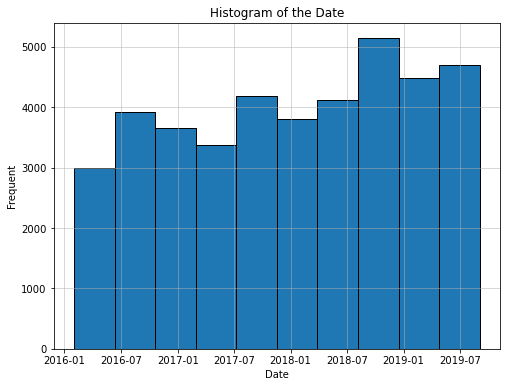

In [42]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of the Date')
plt.xlabel('Date')
plt.ylabel('Frequent')
plt.grid(linestyle='-', linewidth=0.5)
plt.hist(df.iloc[:,1], edgecolor="black")

It is understandable that by passing time, the number of devices are received by the company is increased. For having better intution, the date was spreated into three different columns, day, month, and year for studying the data precisely.

## X3: Enter_Day_Name
## X4: Enter_Month
## X5: Enter_Year

In [51]:
df.iloc[:,4] = df.iloc[:,4].astype(object)
df.iloc[:,2:5].describe(include=object)

,Enter_Month,Enter_Day_Name,Enter_Year
count,40365,40365,40365
unique,12,6,4
top,July,Saturday,2018
freq,4269,7324,12357


Text(0, 0.5, 'Frequency')

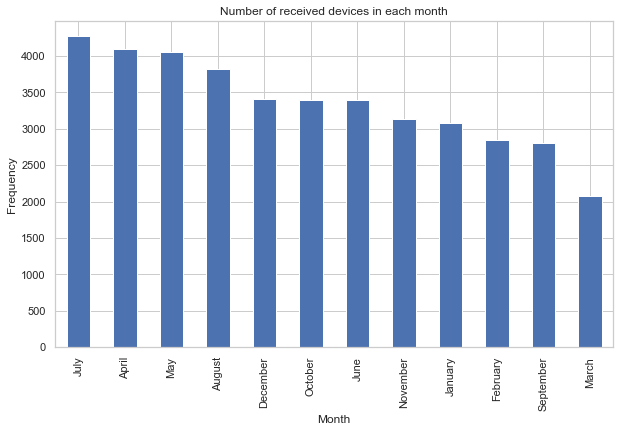

In [94]:
ax = df.iloc[:,2].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Number of received devices in each month")
ax.set_xlabel("Month")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

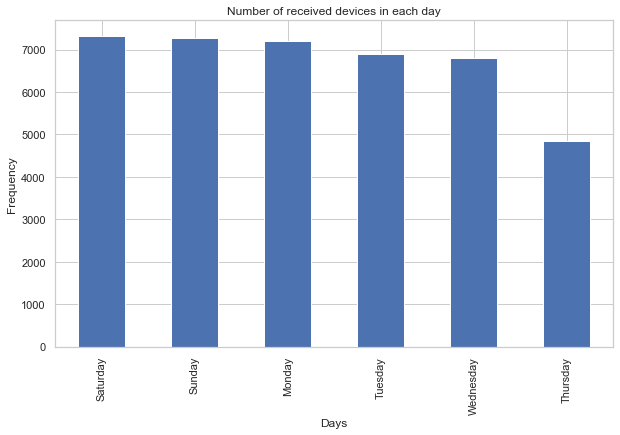

In [95]:
ax = df.iloc[:,3].value_counts().plot(kind='bar',
                                    figsize=(10,6),
                                    title="Number of received devices in each day")
ax.set_xlabel("Days")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

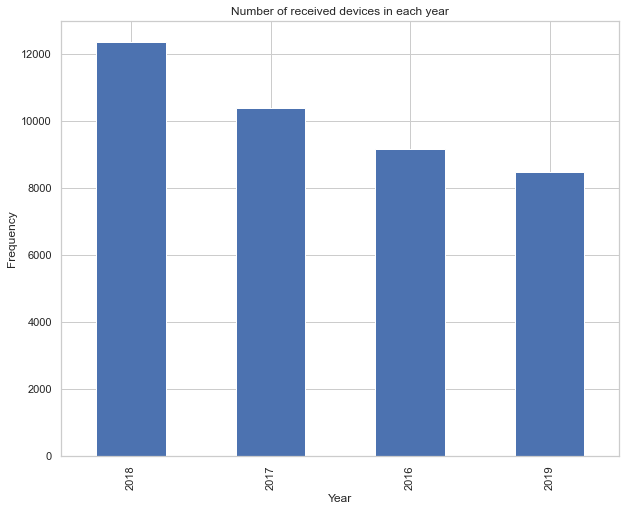

In [97]:
ax = df.iloc[:,4].value_counts().plot(kind='bar',
                                    figsize=(10,8),
                                    title="Number of received devices in each year")
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")

From this part, it can be percieved that in the **March**, the number of received devices is minimum, since the new year of Iran is happen in this month, and so the activities of the company is in the low performance. Also, **Thursday**, has significantly the lowest received devices in compare with other days. Because the next day is Friday, which is a holyday in Iran, and customers reluctant to visit the company in this day.

## X6: Time
It indicates the time when the company receives a device.

In [101]:
df.iloc[:,5].describe(include=all)

count        40365
unique       24021
top       15:52:53
freq             8
Name: Enter_Time, dtype: object

For exhibiting the time distribution, it needs to be transformed into numeric. As a result, the codes below are developed to store the integer value of time in a temporary array.

In [123]:
from datetime import *

df.iloc[:,5]=df.iloc[:,5].agg(pd.Timestamp)

Time = np.zeros((len(df),1))
for i in range(len(df)):
    Time[i] = df.iloc[i,5].hour + (df.iloc[i,5].minute/60)

(array([  19., 1879., 3383., 4397., 4869., 4517., 4512., 4281., 3868.,
        4088., 4028.,  453.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
 <BarContainer object of 12 artists>)

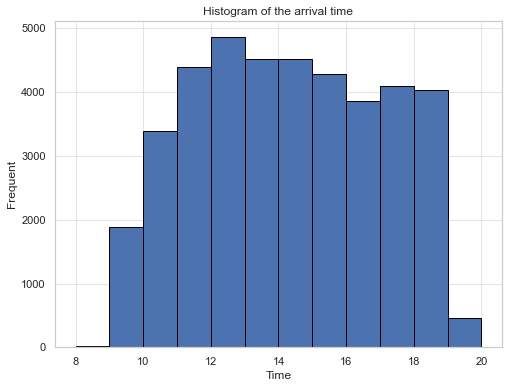

In [136]:
plt.figure(figsize=(8, 6))
plt.title('Histogram of the arrival time')
plt.xlabel('Time')
plt.ylabel('Frequent')
plt.grid(linestyle='-', linewidth=0.5)
plt.hist(Time, bins=range(8,21,1), edgecolor="black")

The histogram of the arrival time manifests that 12 pm and 17 pm can be considered as two maximum of the two separate Normal distributions. All in all, it indicates the fact that customers prefer to come to the company in the meanwhile rather than early morning or late at night, which is logical.


## X7: Brand
This column is included technical information about devices which are arrived in the company. Specifically, this column has stored the brand of each laptop.

In [137]:
df.iloc[:,6].describe(include=object)

count                              40365
unique                                46
top       ASUS                          
freq                                7957
Name: Brand, dtype: object

Text(0, 0.5, 'Frequency')

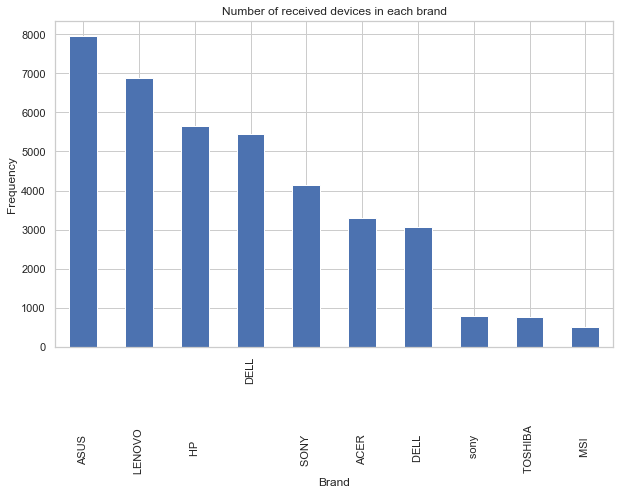

In [142]:
ax = df.iloc[:,6].value_counts()[:10].plot(kind='bar',
                                    figsize=(10,6),
                                    title="Number of received devices in each brand")
ax.set_xlabel("Brand")
ax.set_ylabel("Frequency")

In [143]:
df.iloc[:,6].unique()

array(['sony                          ', 'DELL',
       'HP                            ', 'MACBOOK                       ',
       'COMPAQ                        ', 'ASUS                          ',
       'LENOVO', 'MSI                           ',
       'ACER                          ', 'TOSHIBA', 'SAMSUNG',
       'FUJITSU SIEMENS', 'GIGABYTE', 'LENOVO                        ',
       'TOSHIBA                       ', 'EMACHINE',
       'متفرقه                        ', 'PACKARD BELL                  ',
       'GATEWAY                       ', 'LG                            ',
       'SAMSUNG                       ', 'HASEE                         ',
       'suzuki                        ', 'APPLE                         ',
       'ADVANT                        ', 'GIGABYTE                      ',
       'HYUNDAI                       ', 'ZENITH                        ',
       'SIEMENS                       ', 'ASROCK                        ',
       'SONY                         

Because of several typos and dichotomy in writing the name of each specific brand by clerks, some of them are distinguished differently but the truth is there are the same. To tackle this problem, the text here should be normalized. As a result, **spaces should be eliminated and also all characters should be uppercase**.

In [162]:
df.iloc[:,6].agg(lambda x: x.replace(' ','').upper()).unique()

array(['SONY', 'DELL', 'HP', 'MACBOOK', 'COMPAQ', 'ASUS', 'LENOVO', 'MSI',
       'ACER', 'TOSHIBA', 'SAMSUNG', 'FUJITSUSIEMENS', 'GIGABYTE',
       'EMACHINE', 'متفرقه', 'PACKARDBELL', 'GATEWAY', 'LG', 'HASEE',
       'SUZUKI', 'APPLE', 'ADVANT', 'HYUNDAI', 'ZENITH', 'SIEMENS',
       'ASROCK', 'TEAM', 'LCD', 'ELPIDA', 'SEAGATE', 'WD', 'KINGSTON',
       'SONYERICSSON', 'CRUCIAL', 'DELTA', 'XIAOMI'], dtype=object)

In [163]:
df.iloc[:,6] = df.iloc[:,6].agg(lambda x: x.replace(' ','').upper())

Text(0, 0.5, 'Frequency')

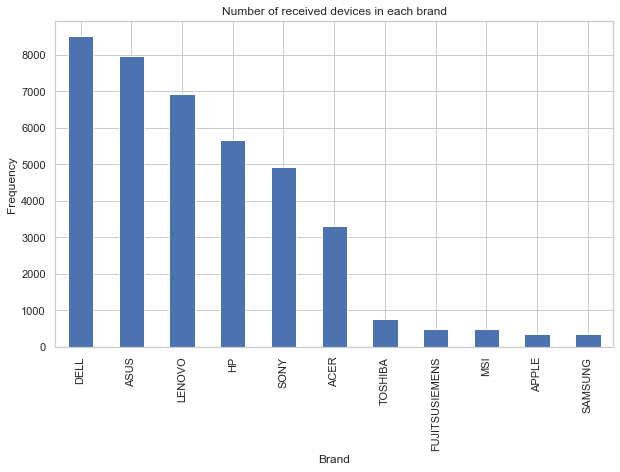

In [166]:
ax = df.iloc[:,6].value_counts()[:11].plot(kind='bar',
                                    figsize=(10,6),
                                    title="Number of received devices in each brand")
ax.set_xlabel("Brand")
ax.set_ylabel("Frequency")

## X8: Model
As same as the previous column, it has stored the model of each laptop that the company receives

In [167]:
df.iloc[:,7].describe(include=object)

count                              40365
unique                              2853
top       N5010                         
freq                                1380
Name: Model, dtype: object

*Normalizing the column*

In [171]:
df.iloc[:,7] = df.iloc[:,7].apply(str)

In [172]:
df.iloc[:,7] = df.iloc[:,7].agg(lambda x: x.replace(' ','').upper())

In [173]:
df.iloc[:,7].describe(include=object)

count     40365
unique     2774
top       N5010
freq       2185
Name: Model, dtype: object

*Since the model is entirely pertinent to the brand, in the following codes, a histogram will be depicted showing the number of different models embedded in each brand.*

In [195]:
brand = df.groupby('Brand')['Model'].nunique()

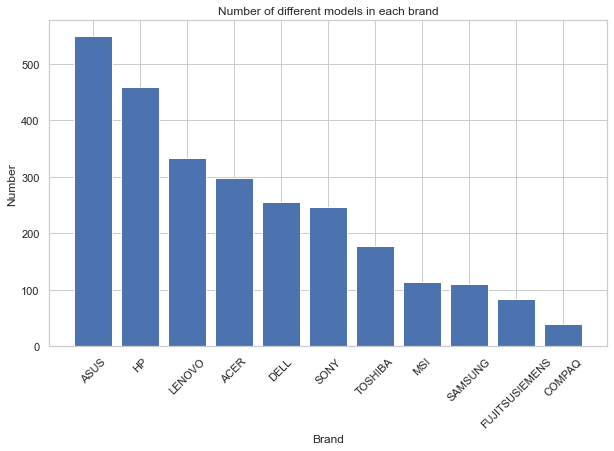

In [220]:
brand = brand.sort_values(ascending=False)
height = brand
bars = (brand.index)
y_pos = np.arange(len(bars))


plt.figure(figsize=(10, 6))
plt.bar(y_pos[:11], height[:11])

plt.title('Number of different models in each brand')
plt.xlabel('Brand')
plt.ylabel('Number')
plt.xticks(y_pos[:11], bars[:11])
plt.xticks(rotation=45)

plt.show()

## X9: Explenation
This column contains notes that have been recorded by technicians about the condition of each device before entering the repair process.

In [221]:
df.iloc[:,8].describe(include=object)

count            40341
unique           23318
top       روشن نمي شود
freq              2621
Name: Explanation, dtype: object

Text(0, 0.5, 'Frequency')

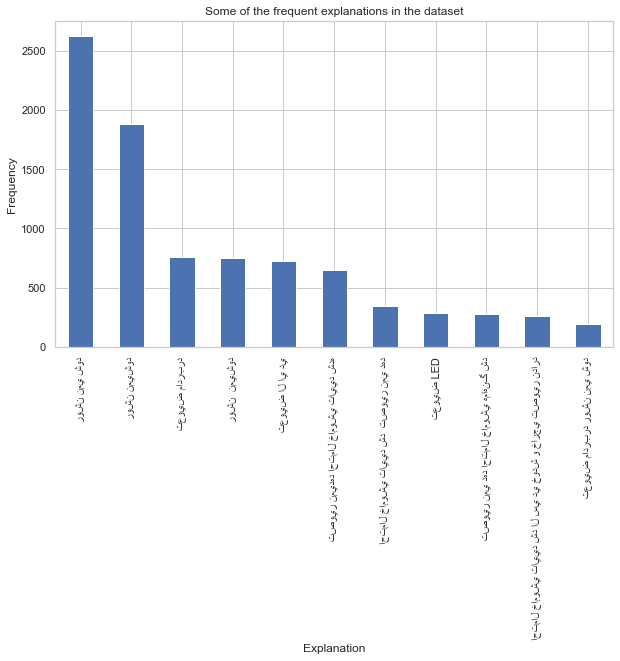

In [224]:
ax = df.iloc[:,8].value_counts()[:11].plot(kind='bar',
                                    figsize=(10,6),
                                    title="Some of the frequent explanations in the dataset")
ax.set_xlabel("Explanation")
ax.set_ylabel("Frequency")

**This variable needs to be preprocessed by NLP techniques to normalize, clean, and extract valuable insight.**

## X10: Estmation 
This column contains the estimation of the cost that technicians provide for each device before entering the repair process.
But, this column is not neat, since it is included both numbers and text simultaneously. 

In [225]:
df.iloc[:,9].describe(include=object)

count      38568
unique      3346
top       800000
freq        4713
Name: Estimated_Price, dtype: int64

## X12: Number_of_devices_have_been_in_the_system 
This column indicates that how many devices are waiting to be repaired, or under repairing, when a new device is arrived in the company.

In [226]:
df.iloc[:,10].describe()

count    40365.000000
mean       233.052199
std         54.573339
min          0.000000
25%        200.000000
50%        232.000000
75%        261.000000
max        455.000000
Name: Received_in_Day, dtype: float64

(array([  13.,   16.,   13.,   14.,   19.,   72.,  121.,  105.,   70.,
          84.,  183.,  191.,  271.,  238.,  347.,  652., 1195., 1659.,
        2121., 2516., 2806., 3184., 3425., 3610., 3638., 3181., 2395.,
        1850., 1421., 1154.,  915.,  729.,  530.,  338.,  179.,  108.,
         112.,  133.,  158.,  166.,  155.,  113.,   89.,   47.,   23.,
           6.,    0.,    0.,    0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]),
 <BarContainer object of 49 artists>)

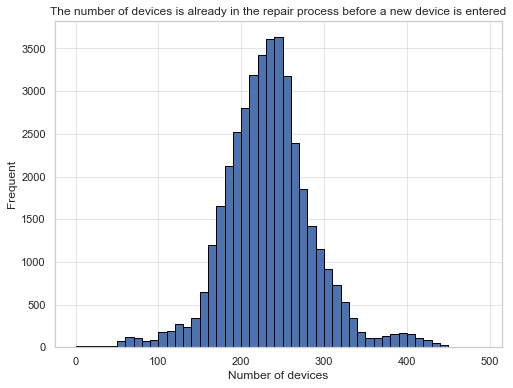

In [237]:
plt.figure(figsize=(8, 6))
plt.title('The number of devices is already in the repair process before a new device is entered')
plt.xlabel('Number of devices')
plt.ylabel('Frequent')
plt.grid(linestyle='-', linewidth=0.5)
plt.hist(df.iloc[:,10], bins=range(0,500,10), edgecolor="black")

## X13: Number_of_devices_are_received_today
This column indicates how many devices are received in a day that the new device arrives as well.

In [238]:
df.iloc[:,11].describe()

count    40365.000000
mean        44.440852
std         12.222194
min          1.000000
25%         37.000000
50%         44.000000
75%         52.000000
max        105.000000
Name: In_Queue, dtype: float64

(array([  20.,  137.,  108.,  348.,  819., 2353., 4069., 5956., 7492.,
        6564., 5190., 3299., 1787.,  939.,  788.,  309.,   82.,    0.,
           0.,    0.,    0.,  105.,    0.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115]),
 <BarContainer object of 23 artists>)

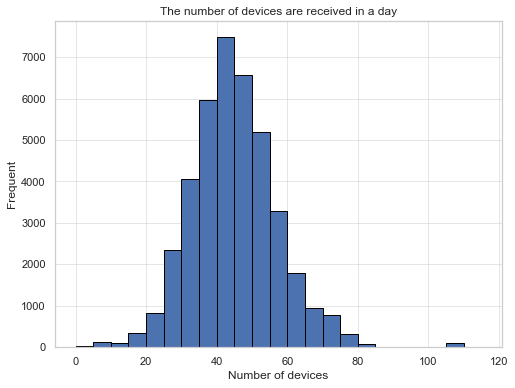

In [243]:
plt.figure(figsize=(8, 6))
plt.title('The number of devices are received in a day')
plt.xlabel('Number of devices')
plt.ylabel('Frequent')
plt.grid(linestyle='-', linewidth=0.5)
plt.hist(df.iloc[:,11], bins=range(0,120,5), edgecolor="black")

## Y: Waiting_Time!
This is the labeled column, or response column of the project:

In [244]:
df.iloc[:,12].describe()

count    40365.000000
mean        15.619076
std         32.989805
min          0.000000
25%          4.000000
50%          8.000000
75%         16.000000
max        975.000000
Name: TotalDays, dtype: float64

(array([11512., 11454.,  6414.,  3290.,  2112.,  1268.,   831.,   611.,
          433.,   353.,   238.,   213.,   171.,   154.,   124.,   141.,
          133.,    78.,    82.,    65.,    53.,    53.,    50.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115]),
 <BarContainer object of 23 artists>)

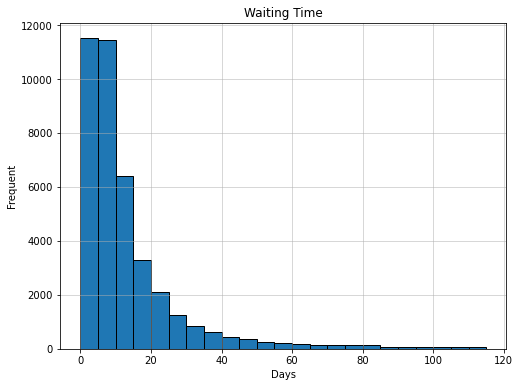

In [3]:
plt.figure(figsize=(8, 6))
plt.title('Waiting Time')
plt.xlabel('Days')
plt.ylabel('Frequent')
plt.grid(linestyle='-', linewidth=0.5)
plt.hist(df.iloc[:,12], bins=range(0,120,5), edgecolor="black")

(array([11593.,  7757.,  4024.,  2776.,  2155.,  1555.,  1346.,  1142.,
          790.,   593.,   505.,   477.,   391.,   401.,   411.,   292.,
          217.,   209.,   212.,   166.,   177.,   169.,   155.,   126.,
           97.,    88.,    85.,    80.,   165.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

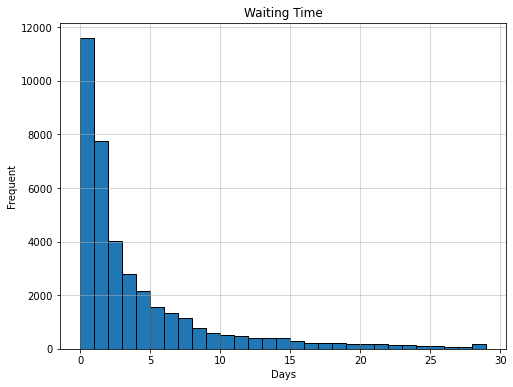

In [6]:
plt.figure(figsize=(8, 6))
plt.title('Waiting Time')
plt.xlabel('Days')
plt.ylabel('Frequent')
plt.grid(linestyle='-', linewidth=0.5)
plt.hist(df.iloc[:,14], bins=range(0,30,1), edgecolor="black")

In [7]:
min_value = df['DaysToFinished'].min()
max_value = df['DaysToFinished'].max()
print(min_value)
print(max_value)

0
43317


In [21]:
pd.qcut(df['DaysToFinished'], q=6 , duplicates='drop')

0         (-0.001, 1.0]
1            (2.0, 4.0]
2            (1.0, 2.0]
3         (-0.001, 1.0]
4        (9.0, 43317.0]
              ...      
40360     (-0.001, 1.0]
40361     (-0.001, 1.0]
40362     (-0.001, 1.0]
40363     (-0.001, 1.0]
40364     (-0.001, 1.0]
Name: DaysToFinished, Length: 40365, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 4.0] < (4.0, 9.0] < (9.0, 43317.0]]